# Exercise 3: Correlation and Regression 


*This notebook has been created by Julia Kukulies (julia.kukulies@gu.se) as a modified version from the exercise for GVN370 that has been created by Céline Heuzé.*

Many climate variables vary with each other, either because one causes the other, or because they
are both dependent on an extra third variable.

When two variables vary with each other, we say that they are correlated. A positive correlation
means that the maxima of one are at the same time as the maxima of the other (they vary “in phase”);
a negative correlation, the maxima of one are at the same time as the minima of the other (“opposition
of phase”).

A regression takes this relationship one step further and allows you to express one of these variables
(y) as a function of the other (x). We will today look only at the classic case of linear regression, but
many more types of regressions exist. In the case of a linear regression, you want to find two
parameters, often called the slope and the offset, that allow you to write:


**y= slope*x + offset**


Today’s exercise will show you how to:
- load a .txt file;
- perform a correlation and a linear regression between two 1D timeseries
- perform a correlation between a 3D field and a 1D timeseries.
- I am going to demonstrate today’s exercise using the monthly sea surface height downloaded from CMEMS that I already used during ex1, as well as the monthly NAO index. We are going to compare the two, and see if the SSH over the North Atlantic and NAO are correlated (they should be).


Your first mission is to find somewhere online the **monthly North Atlantic Oscillation**.




# Load a .txt file 

The state-of-the-art tool to work with tables in Python are [Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Pandas provied three methods to open text files: 

- [pandas.read_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html)
- [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- [pandas.read_fwf()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html)


The main differences between these functions is how the text files are formatted. The most general one is the first one which can be used for any kind of delimited files into a dataframe. You may want to use any of them dependent on the file you found. But for many standard .csv or .txt files al three methods work well. Sometimes you have to define a few parameters to correctly read in the data (e.g. Which separator is used? HOw many lines are the header that you do not want to include? What should be the fill value for missing data?) 

In [1]:
# standard way of importing pandas 
import pandas as pd 

# numpy is nearly always needed 
import numpy as np 

# library for plotting
import matplotlib.pyplot as plt 

In [2]:
# define the path to your file (if not in same folder)
path = 'nao_station_monthly.txt'
nao = pd.read_table(path, header= 1, delimiter = '\s+' , na_values = -999)

# look at the pandas dataframe 
nao 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1865,-0.6,-1.2,0.2,-0.2,-0.4,0.0,0.5,1.5,1.8,-2.0,-0.9,0.8
1866,0.5,0.8,-0.6,-2.3,-2.0,0.9,-0.5,-0.2,2.4,-0.3,-0.5,0.2
1867,-3.5,1.1,-4.3,1.8,-4.2,0.1,-2.0,1.9,1.4,2.2,-3.5,-0.1
1868,0.7,3.0,3.6,1.7,2.3,3.1,0.4,1.5,-2.8,3.5,-1.8,-0.1
1869,1.0,2.5,0.2,-0.2,-2.7,-1.9,-0.3,-1.0,-0.4,-1.4,1.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.0,2.4,1.4,-1.7,-0.8,-0.2,0.4,0.2,2.8,-1.2,1.0,0.9
2017,-0.4,1.2,1.5,-1.0,-2.4,1.4,1.8,0.3,2.3,0.7,-1.2,0.8
2018,2.4,0.9,-1.0,1.2,3.9,0.0,1.5,2.2,0.6,1.0,-0.2,0.1
2019,0.1,0.1,2.6,0.0,-1.8,-2.5,-0.9,-0.5,1.0,-1.3,0.4,0.8


As you see, the dataframe has 156 rows (one for each year) and 12 columns (one for each month). So we have data with two dimensions here. 

But you could easily reduce it to one dimension with 156x12 values instead, because the datapoints are only a dependent on time (and not lon and lat, as in the other two exercises): 

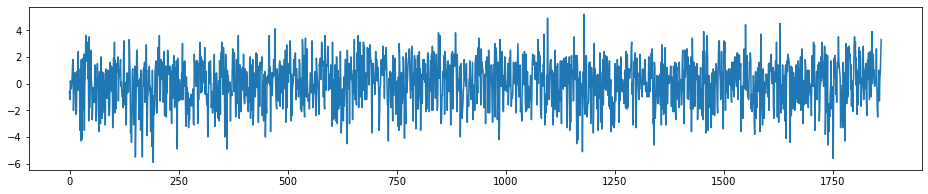

In [3]:
nao1D= nao.values.flatten()

# quick look at 1D timeseries 
plt.figure(figsize=(16,3))
plt.plot(nao1D)
plt.show()

# Perform a correlation and regression between two 1D timeseries


1. Read in the sea surface height data from CMEMS (as in ex1) 
2. Limit NAO and *zos* to the time period to make them comparable

-> There are multiple solutions for this. I show here one example where get a 1D array with [datetime.date](https://docs.python.org/3/library/datetime.html) values (preferrable to strings, because less prone to human mistakes and less manual work) for each of the two datasets and use [numpy.intersect1D](https://numpy.org/doc/stable/reference/generated/numpy.intersect1d.html) to define the common times. 

In [6]:
import xarray as xr 
f= 'cmems_mod_nws_phy-ssh_my_7km-2D_P1M-m_1611418096178.nc'
data= xr.open_dataset(f)
zos= data.zos

In [7]:
import datetime 
# create empty array
times_nao = np.array(())
# loop through columns and rows to extract dates
for col in np.arange(nao.shape[1]):
    for row in np.arange(nao.shape[0]):
        date = datetime.date(nao.index[row], col + 1, 1)
        # append dates 
        times_nao= np.append(times_nao, date )
        
# sort dates
times_nao=np.sort(times_nao, axis=0)

In [8]:
# get the same datetime.date array for the zos times
times_zos = np.array(())
for date in zos.time.values:
    date = datetime.date(date.year, date.month, 1)
    times_zos= np.append(times_zos, date)

In [10]:
# Find common times 
common_times = np.intersect1d(times_nao, times_zos)

# 324 months are the same 
#(all from zos, but not all from NAO)]
common_times.shape

(324,)

3. Select only the datapoints of these two timeseries that correspond to the common times.  


4. Now, select a point between Iceland and the Faroe islands, for example longitude 12$^\circ$W and latitude 63$^\circ$N. You know by know which function to use, otherwise go back to ex1 and ex2.


5. Plot the two timeseries in the same plot with [matplotlib](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) using [two yaxes](https://matplotlib.org/gallery/api/two_scales.html) to get a feeling for how well they correlate. 


You should obtain something similar to this: 

In [20]:
# extract data points for common times 
nao_common = np.array(())
for t in common_times:
    nao_common = np.append(nao_common, nao1D[times_nao == t])

In [18]:
north_atlantic= zos.sel(longitude= -12, latitude =63, method = 'nearest')

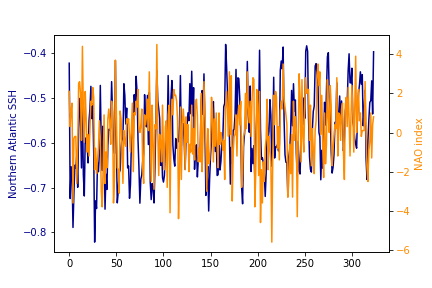

In [25]:
from PIL import Image
Image.open('ssh_nao_timeseries.png')

Note: This is your own working plot – as long as you know what is on each axis, that’s all that matters. We
will see together on Monday next week how to label the axes etc. if this code example just confuses you right now. 

**Are they correlated?**

For now, the answer is: wow, they indeed look to vary with each other, i.e. they look correlated! Let
us mathematically verify this using one of the correlation functions, for example with [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) or [scipy.stats.linregress()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

In [23]:
from scipy import stats 
slope, intercept, r_value, p_value, std_err = stats.linregress(nao_common,north_atlantic.values)

print('R =', r_value, 'p =',p_value)

R = 0.4676020185736565 p = 5.2617470967125e-19



As you can see, the function returns the p-value and the r-value (correlation coefficient). In general in
climate science, a correlation is considered significant if the p-value is lower than 0.05. It is way more complicated than that, but that’s common practice. Here, p is VERY low, so the correlation is **statistically significant**. 



When two variables are this correlated, plotting one as a function of the other using [plt.scatter()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) should
return something that looks like a line. A linear regression helps you properly fit a line through such
plot (that’s why you may have heard refer to it as “line-fitting”).

There’s many ways to perform a linear regression. I like [scipy.stats.linregress()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), because its use is straight forward and you can do the significance test, calculate the corr coefficient and get the slope and intercept in one go! However, another usful method is to use [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), which is nice because you can use them for more than just linear regression (you fit a polynom, reminder: a linear relationship is a polynom of degree 1, so in other words a specific case for polynomial fit). 


Since you already got the **slope** and **intercept**, you can now plot the two timeseries to compare them **and** draw a regression line:

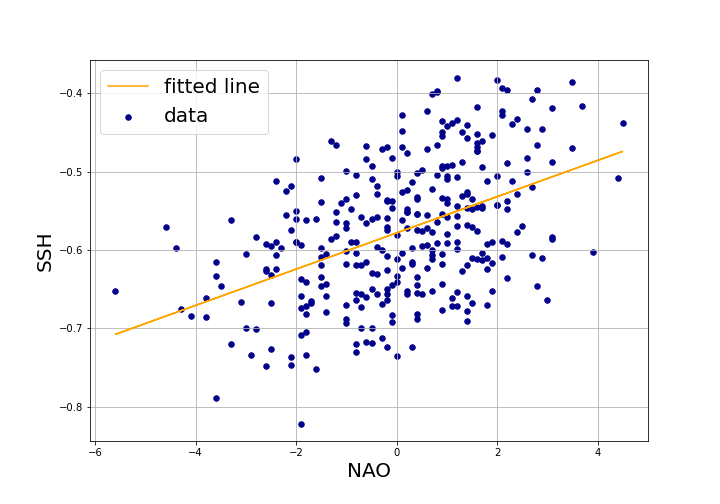

In [26]:
Image.open('nao_ssh_scatter.png')

# Perform a correlation between a 3D field and a 1D timeseries 

We now know that this one grid cell in the SSH data is positively correlated to the NAO. But how do we
do that over the entire dataset without producing over 100000 plots?



...with loops of course! 

**Note**: A more efficient way of doing it would be to vectorize the matrix. That is true generally for problems where you have to loop through each element (here grid cell) of a multi-dimensional array and in most cases Python (Numpy) has a solution for this, or another hacker has found one for you :). One practical tool for this -if you want to give it a try- comes from a package developed by Metoffice: [iris.analysis.stats](https://scitools.org.uk/iris/docs/v1.7/iris/iris/analysis/stats.html) (tip:but here the two data arrays must have the same dimensions, so creating a lon-lat field with the repeating 1D timeseries would be once possibility here to do so).But since this a bit beyond the scope of the course, you can definitely use the loop-technique here!    



Try and write without my help a script that would produce a correlation matrix, that has one row per
longitude and one column per latitude. For each longitude and latitude, calculate the correlation coefficient and p-value between the ssh at this longitude and latitude, and the NAO. Store the correlation coefficient in matcorr only if the p-value is lower than 0.05. Otherwise, set the corresponding grid cell to NaN.


**Bonus**: plot the map now (with [plt.pcolormesh](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.pcolormesh.html), or wait till we’ve done some map plotting on Monday.